In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import train_test_split

# Cuadrados Mínimos

### Laboratorio de Datos, IC - FCEN - UBA - 1er. Cuatrimestre 2024

Buscamos los coeficientes de un polinomio de grado $n$
$$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \dots + \beta_n X^n$$

que mejor aproxime a nuestros datos en el sentido de Cuadrados Mínimos. Es decir, buscamos $\beta_1,\dots, \beta_n$ que minimicen:
$$ RSS(\beta) = \displaystyle\sum_{i=1}^n (y_i - P(x_i))^2 $$

Vamos a usar como ejemplo los datos de PBI per capita de Argentina, del dataset `gapminder`

In [230]:
from gapminder import gapminder
datos_arg = gapminder[gapminder['country'] == 'Argentina']
datos_arg.head()

,country,continent,year,lifeExp,pop,gdpPercap
48,Argentina,Americas,1952,62.485,17876956,5911.315053
49,Argentina,Americas,1957,64.399,19610538,6856.856212
50,Argentina,Americas,1962,65.142,21283783,7133.166023
51,Argentina,Americas,1967,65.634,22934225,8052.953021
52,Argentina,Americas,1972,67.065,24779799,9443.038526


### Visualización

Teníamos la visualización de la Regresión Lineal:

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


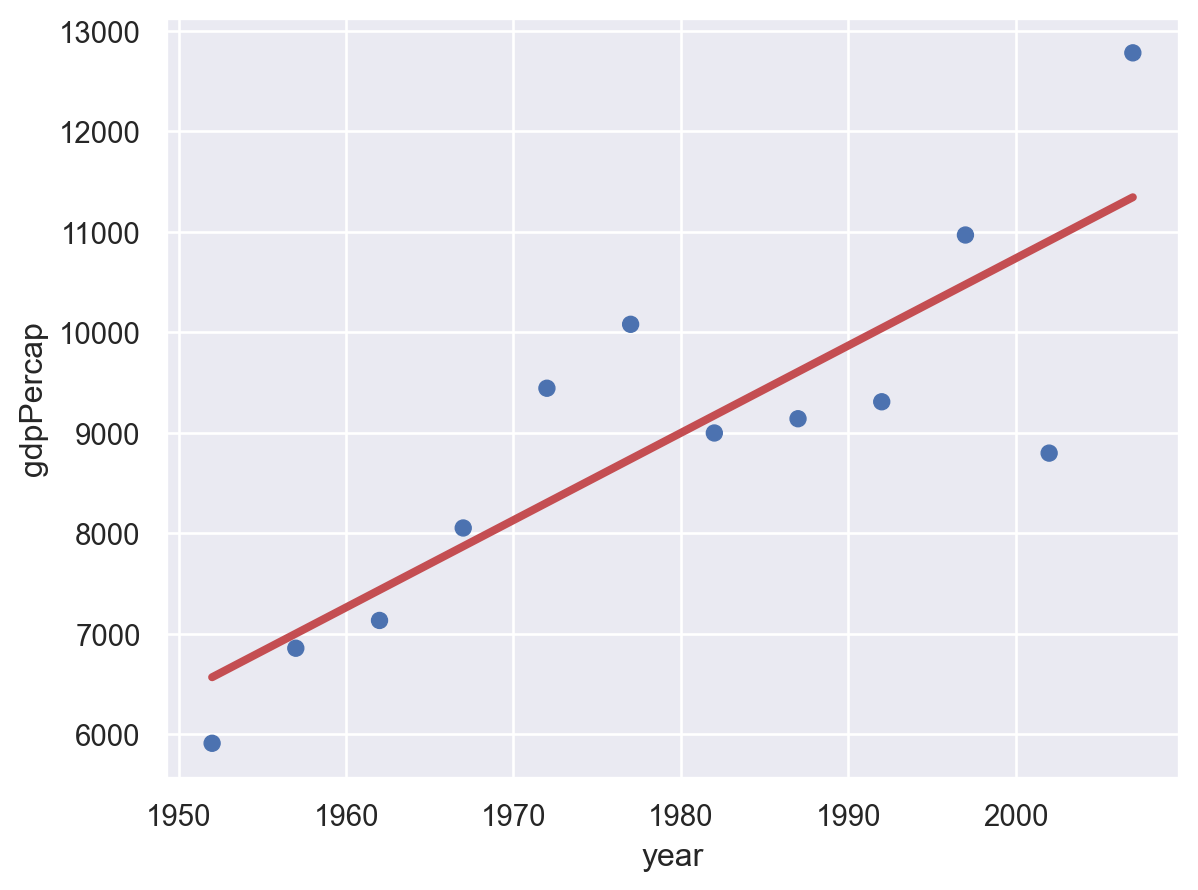

In [231]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(1))
)

Calculemos el $R^2$ de la Regresión Lineal:

In [232]:
# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression()

# Realiza el ajuste
modelo.fit(datos_arg[['year']], datos_arg['gdpPercap'])

# Calculamos R²
y_pred = modelo.predict(datos_arg[['year']])
r2_score(datos_arg['gdpPercap'], y_pred)

0.7060056670920886

Para cambiar el grado del polinomio que ajusta los datos, simplemente cambios el argumento de `so.PolyFit`. Por ejemplo, para un polinomio de grado $3$:

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


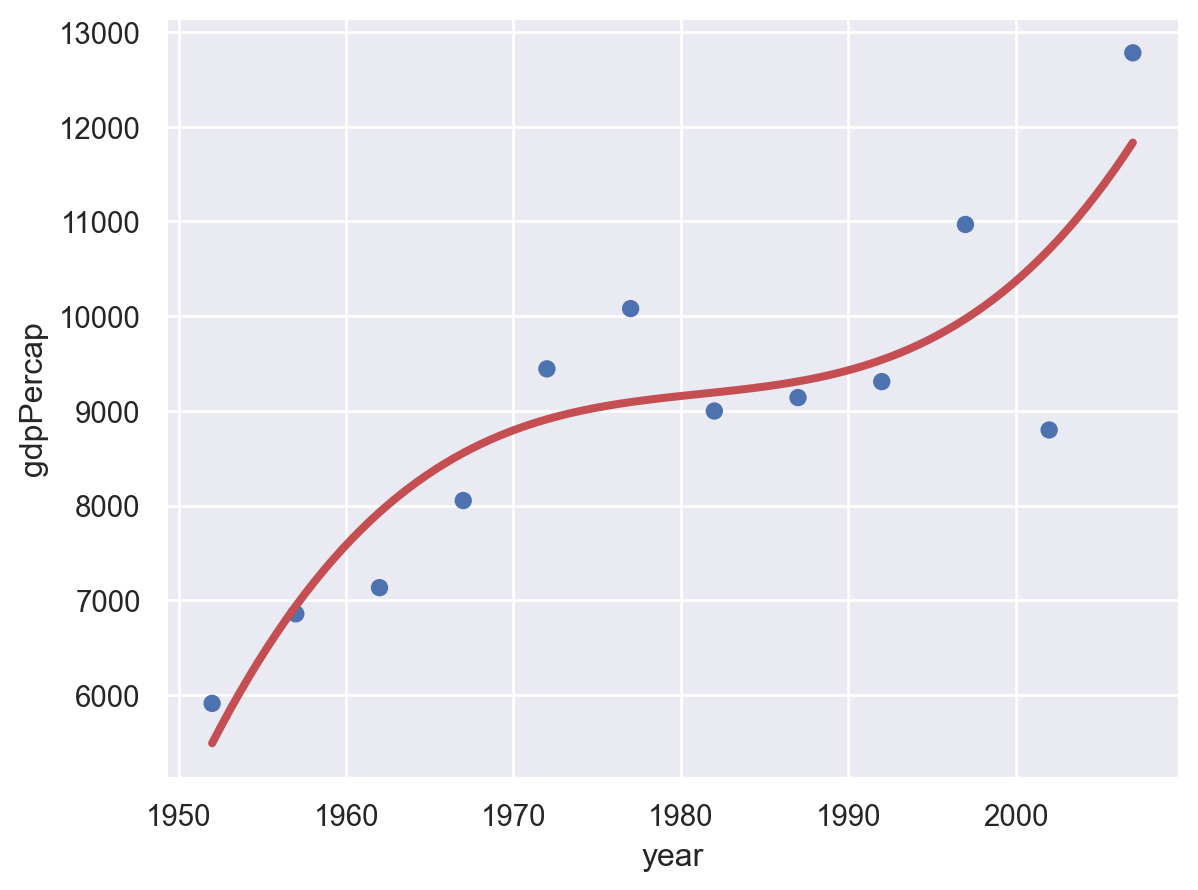

In [233]:
(
    so.Plot(data=datos_arg, x=datos_arg['year'], y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='r', linewidth=3), so.PolyFit(3))
)

### Cálculo de coeficientes y de predicciones

Queremos buscar el polinomio de grado 3 que mejor aproxima a los datos en sentido de cuadrados mínimos:
$$P(x) = \beta_0 + \beta_1 x + \beta_2 x^ 2 + \beta_3 x^ 3$$

Calcularemos los coeficientes con `scikit-learn`. Es parecido a lo que hacíamos con la regresión lineal, pero con un paso extra:

In [234]:
# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features= PolynomialFeatures(degree=3, include_bias=False)  # esto último es como un "por ahora olvidate del B0"

# Armamos una matriz cuya primera columna es x, la segunda es x^2 y la tercera es x^3
x_poly = polynomial_features.fit_transform(datos_arg[['year']])   
display(x_poly) #arma una matriz donde en la 1ra columna están los xi, en la 2da xi², en la 3ra xi³

array([[1.95200000e+03, 3.81030400e+06, 7.43771341e+09],
       [1.95700000e+03, 3.82984900e+06, 7.49501449e+09],
       [1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.96700000e+03, 3.86908900e+06, 7.61049806e+09],
       [1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.97700000e+03, 3.90852900e+06, 7.72716183e+09],
       [1.98200000e+03, 3.92832400e+06, 7.78593817e+09],
       [1.98700000e+03, 3.94816900e+06, 7.84501180e+09],
       [1.99200000e+03, 3.96806400e+06, 7.90438349e+09],
       [1.99700000e+03, 3.98800900e+06, 7.96405397e+09],
       [2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [2.00700000e+03, 4.02804900e+06, 8.08429434e+09]])

In [235]:
# Inicializamos el modelo de regresión
modelo = linear_model.LinearRegression()

# Realiza el ajuste
modelo.fit(x_poly, datos_arg['gdpPercap'])

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo.coef_

# Recuperamos la ordenada al origen
o_origen = modelo.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])
print('beta_3: ', beta[2])

beta_0:  -984937719.5998886
beta_1:  1491410.418881869
beta_2:  -752.7757907809373
beta_3:  0.1266538016738689


In [236]:
np.flip(beta)

array([ 1.26653802e-01, -7.52775791e+02,  1.49141042e+06])

El polinomio de grado a lo sumo 3 que mejor aproxima a los datos es:
$$P(x) = -984937719.58 + 1491410.41 x -752.77 x^ 2 + 0.12 x^ 3 $$

Corroboremos que el gráfico de este polinomio es el mismo que arma `seaborn` con `so.PolyFit`:

In [237]:
(
    so.Plot(data=datos_arg, x='year', y='gdpPercap')
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=o_origen + beta[0]*datos_arg['year'] + beta[1]*datos_arg['year']**2 + beta[2]*datos_arg['year']**3, label='sklearn')
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(3), label='seaplot')
    .label()
)

ValueError: Could not interpret value `sklearn` for `label`. An entry with this name does not appear in `data`.

Igual que antes, podemos estimar el PBI per capita, por ejemplo para 1990:

* haciendo las cuentas:

In [238]:
# Estimando el PBI per capita de 1990 haciendo las cuentas con los valores de beta
o_origen + beta[0]*1990 + beta[1]*1990**2 + beta[2]*1990**3

9427.720730185509

* usando `predict`

In [239]:
# Usando .predict()
modelo.predict([[1990, 1990**2, 1990**3]]).item()

9427.720730185509

In [240]:
# O mas rapido, esto genera el array de potencias de 1990 desde 1 a 3 inclusive
pots = 1990 ** np.arange(1, 4)
modelo.predict([pots]).item()

-1087938444.4859436

* usando `numpy`

In [241]:
# Primero tenemos que dar vuelta el vector de coeficientes
# porque numpy los toma desde el de mayor potencia al de menor
beta_flip = np.flip(beta) 
print(beta)
print(beta_flip)

[ 1.49141042e+06 -7.52775791e+02  1.26653802e-01]
[ 1.26653802e-01 -7.52775791e+02  1.49141042e+06]


In [242]:
# Segundo, agregamos al final la ordenada al origen
poly_coefs = np.concatenate((beta_flip, [o_origen]))
print(poly_coefs)

[ 1.26653802e-01 -7.52775791e+02  1.49141042e+06 -9.84937720e+08]


In [243]:
# Finalmente, usamos np.polyval para evaluar el polinomio en 1990
np.polyval(poly_coefs, 1990)

9427.720730423927

También podemos calcular las medidas de desempeño del modelo:

In [244]:
y_pred = modelo.predict(x_poly)

# Calculando el R^2
r2 = r2_score(datos_arg['gdpPercap'], y_pred)
print('R^2: ', r2)

# Calculando el ECM
ecm = mean_squared_error(datos_arg['gdpPercap'], y_pred)
print('ECM: ', ecm)

R^2:  0.7910974741669714
ECM:  664333.9855156279


## Ejercicios práctica 5

# Ejercicio 1

In [2]:
penguins = sns.load_dataset ("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins.isnull().values.any()

True

In [4]:
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [5]:
penguins.shape

(333, 7)

In [6]:
len(penguins)

333

In [7]:
# Parte b)
train_ind = np.full((333,7), False )
train_ind[0:266] = True
np.random.shuffle(train_ind) # Lo guarda en el mismo vector .
penguins_train = penguins[train_ind]
penguins_test = penguins[np.logical_not(train_ind)]

Otras formas de resolver el item

In [8]:
# Forma A:
train_ind = np.full(len(penguins), False)
train_ind[0: int(len(penguins) * 0.8)] = True
np.random.shuffle(train_ind) # Lo guarda en el mismo vector
penguins_train = penguins[train_ind == True]
penguins_test = penguins[train_ind == False]

In [9]:
# Forma B:
penguins_train, penguins_test = train_test_split(penguins, test_size = 0.2, random_state = 42)

In [16]:
X = penguins[["flipper_length_mm"]]
y = penguins["body_mass_g"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train, y_train)
beta_1 = modelo.coef_
beta_2 = modelo.intercept_
print(beta_1, beta_2)

[50.41798199] -5919.258741821233


In [255]:
# Indicamos que queremos un polinomio de Grado 1 sin ordenada al origen
polynomial_features_1= PolynomialFeatures(degree=1, include_bias=False)  # esto último es como un "por ahora olvidate del B0"

# Armamos una matriz cuya primera columna es x
x_train_poly1 = polynomial_features_1.fit_transform(X_train)
x_test_poly1 = polynomial_features_1.transform(X_test)

In [256]:
# Inicializamos el modelo de regresión
modelo1 = linear_model.LinearRegression()

# Realiza el ajuste
modelo1.fit(x_train_poly1, y_train)

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo1.coef_

# Recuperamos la ordenada al origen
o_origen = modelo1.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])

beta_0:  -5919.258741821233
beta_1:  50.41798199462178


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


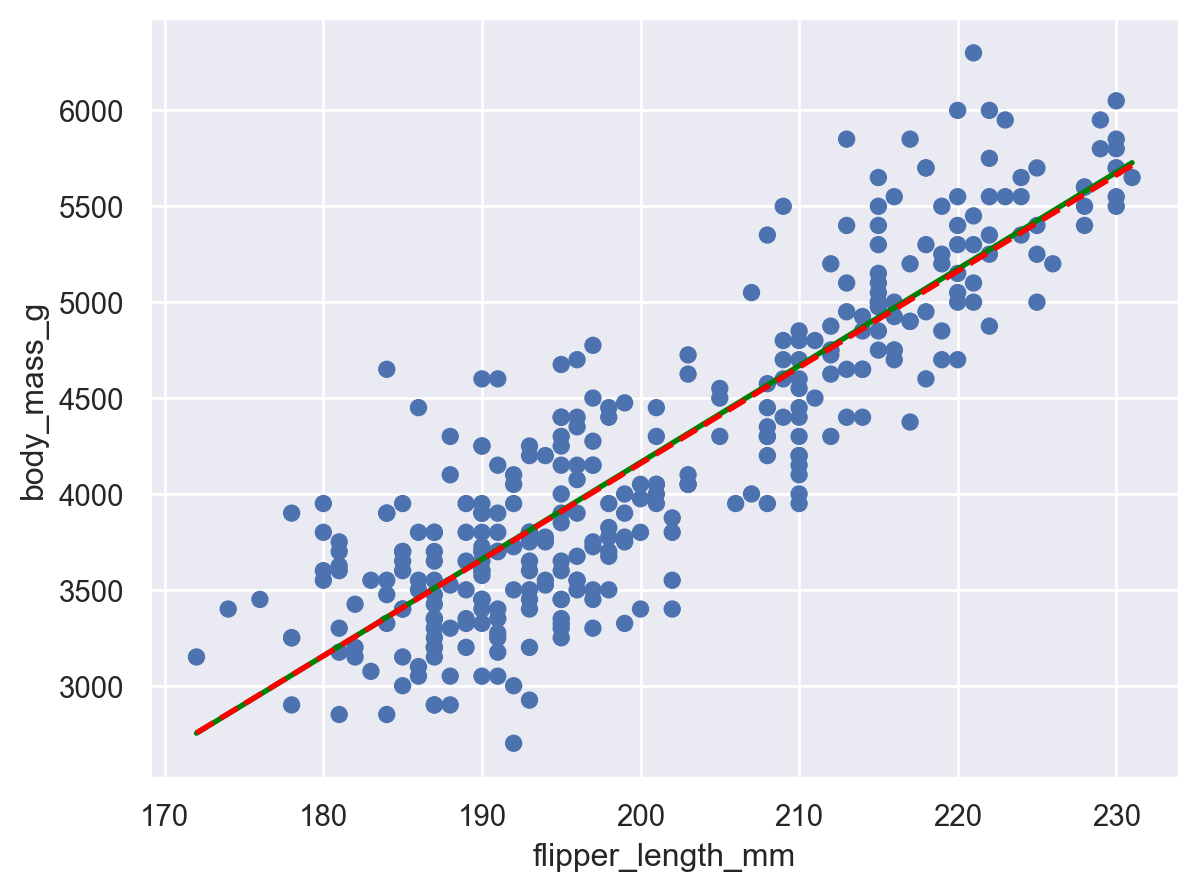

In [257]:
(
    so.Plot(data=penguins, x="flipper_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=o_origen + beta[0]*penguins["flipper_length_mm"])
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(1))
    .label()
)

In [258]:
# Indicamos que queremos un polinomio de Grado 2 sin ordenada al origen
polynomial_features_2= PolynomialFeatures(degree=2, include_bias=False)  # esto último es como un "por ahora olvidate del B0"
# Armamos una matriz cuya primera columna es x
x_train_poly2 = polynomial_features_2.fit_transform(X_train)
x_test_poly2 = polynomial_features_2.transform(X_test)

In [259]:
# Inicializamos el modelo de regresión
modelo2 = linear_model.LinearRegression()

# Realiza el ajuste
modelo2.fit(x_train_poly2, y_train)

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo2.coef_
print(beta)

# Recuperamos la ordenada al origen
o_origen = modelo2.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])

[-193.49746518    0.60030709]
beta_0:  18738.92515391674
beta_1:  -193.4974651774694
beta_2:  0.600307092716263


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


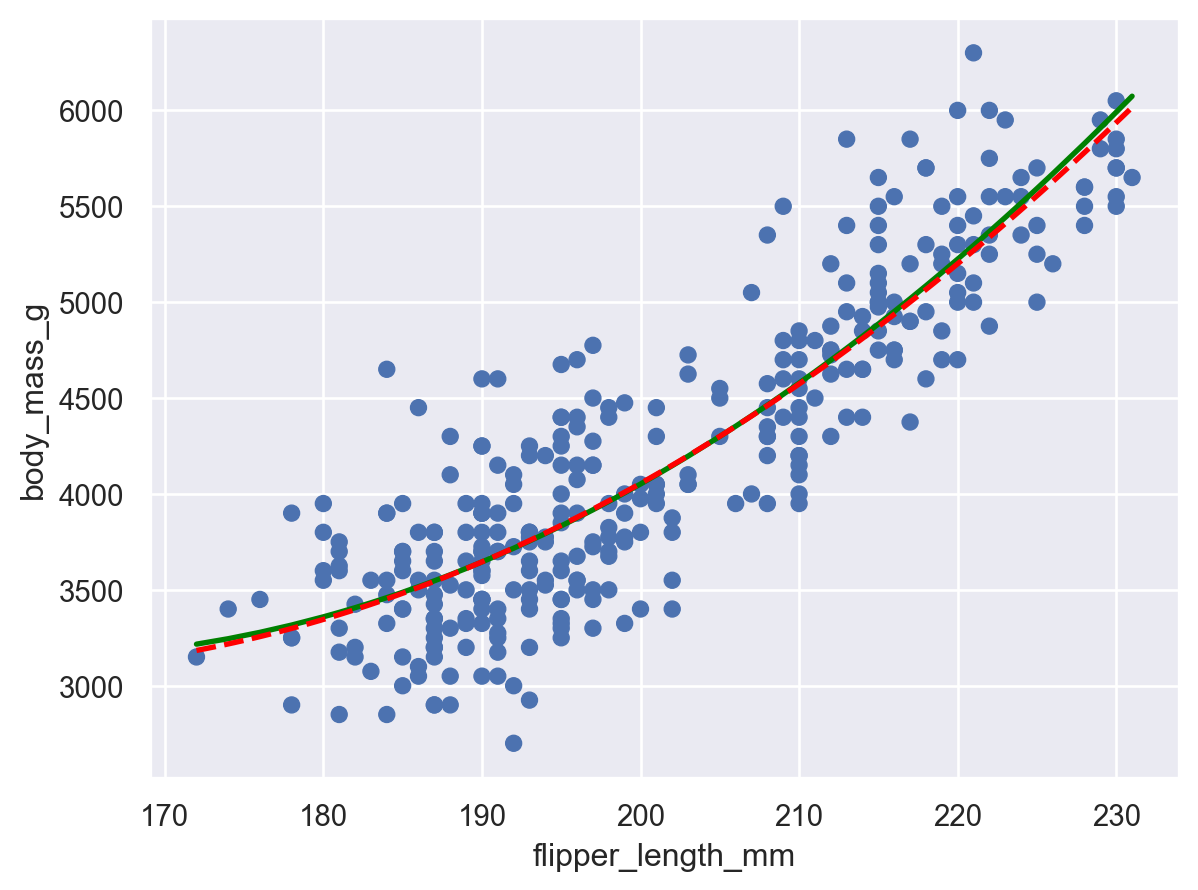

In [260]:
(
    so.Plot(data=penguins, x="flipper_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=o_origen + beta[0]*penguins["flipper_length_mm"] + beta[1]*penguins["flipper_length_mm"]**2)
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(2))
    .label()
)

In [261]:
# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features_3= PolynomialFeatures(degree=3, include_bias=False)  # esto último es como un "por ahora olvidate del B0"
# Armamos una matriz cuya primera columna es x
x_train_poly3 = polynomial_features_3.fit_transform(X_train)
x_test_poly3 = polynomial_features_3.transform(X_test)

In [262]:
# Inicializamos el modelo de regresión
modelo3 = linear_model.LinearRegression()

# Realiza el ajuste
modelo3.fit(x_train_poly3, y_train)

# Recuperamos los valores de los coeficientes (de menor potencia a la mayor)
beta = modelo3.coef_

# Recuperamos la ordenada al origen
o_origen = modelo3.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])
print("beta_3 : ", beta[2])

beta_0:  180980.67473969047
beta_1:  -2607.034058245732
beta_2:  12.532584179712533
beta_3 :  -0.019604686581444118


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


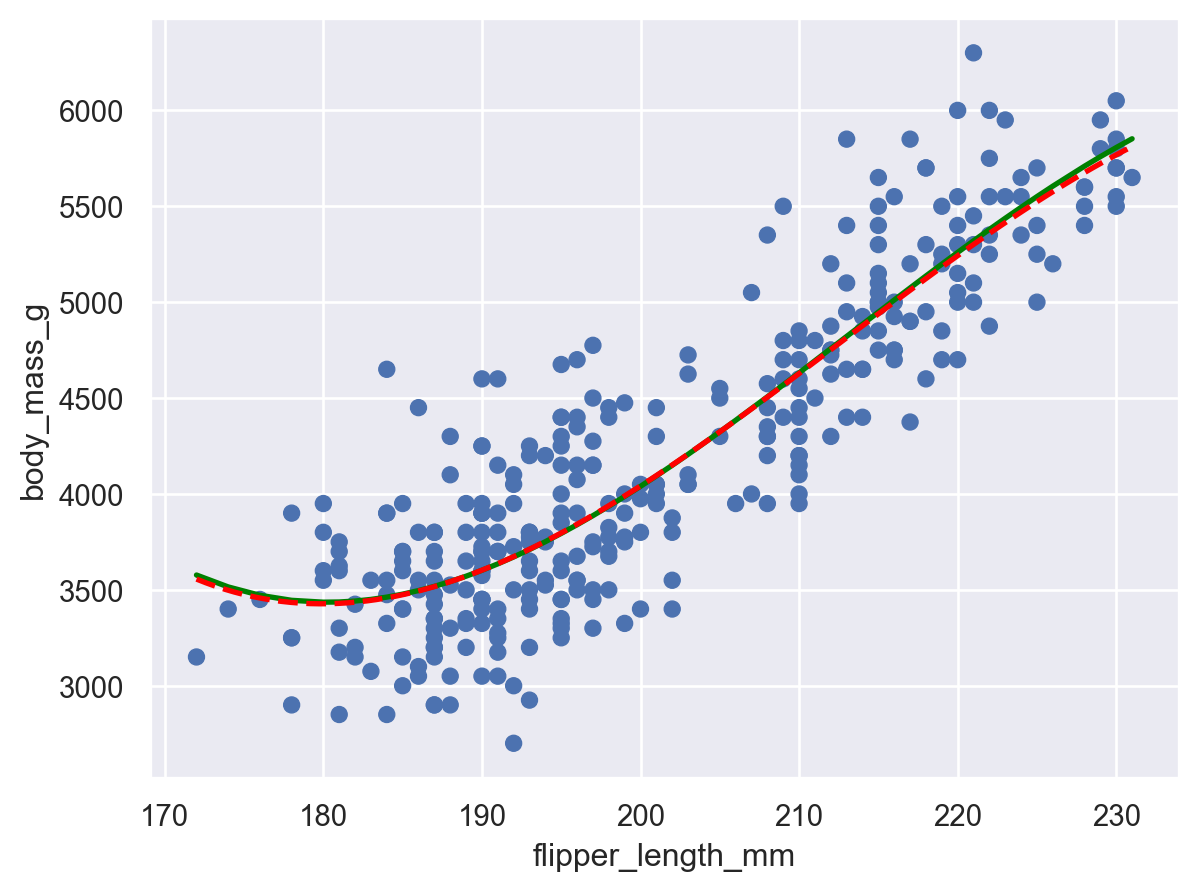

In [263]:
(
    so.Plot(data=penguins, x="flipper_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), y=o_origen + beta[0]*penguins["flipper_length_mm"] + beta[1]*penguins["flipper_length_mm"]**2 + beta[2]*penguins["flipper_length_mm"]**3)
    .add(so.Line(color='red', linestyle='--', linewidth=2), so.PolyFit(3))
    .label()
)

# Consulta sobre esto, cuando hago las predicciones tengo que hacerlas para train y para test o alcanza con hacerlo solo para test? Porque cuando ajustamos el modelo lo ajustamos para train.

In [264]:
# (d) Predicciones
y_train_pred1 = modelo1.predict(x_train_poly1)
y_test_pred1 = modelo1.predict(x_test_poly1)

# Calculando el R^2 en entrenamiento y testeo
r2_train = r2_score(y_train, y_train_pred1)
print('R^2 del modelo 1 entrenamiento: ', r2_train)
r2_test = r2_score(y_test, y_test_pred1)
print('R^2 del modelo 1 testeo: ', r2_test)

# Calculando el ECM
ecm_train = mean_squared_error(y_train, y_train_pred1)
print('ECM del modelo 1 entrenamiento: ', ecm_train)
ecm_test = mean_squared_error(y_test, y_test_pred1)
print('ECM del modelo 1 testeo: ', ecm_test)

y_train_pred2= modelo2.predict(x_train_poly2)
y_test_pred2= modelo2.predict(x_test_poly2)

# Calculando el R^2
r2_train = r2_score(y_train, y_train_pred2)
print('R^2 del modelo 2 entrenamiento: ', r2_train)
r2_test = r2_score(y_test, y_test_pred2)
print('R^2 del modelo 2 testeo: ', r2_test)

# Calculando el ECM
ecm_train = mean_squared_error(y_train, y_train_pred2)
print('ECM del modelo 2 entrenamiento: ', ecm_train)
ecm_test = mean_squared_error(y_test, y_test_pred2)
print('ECM del modelo 2 testeo: ', ecm_test)

y_train_pred3 = modelo3.predict(x_train_poly3)
y_test_pred3 = modelo3.predict(x_test_poly3)

# Calculando el R^2
r2_train = r2_score(y_train, y_train_pred3)
print('R^2 del modelo 3 entrenamiento: ', r2_train)
r2_test = r2_score(y_test, y_test_pred3)
print('R^2 del modelo 3 testeo: ', r2_test)

# Calculando el ECM
ecm_train = mean_squared_error(y_train, y_train_pred3)
print('ECM del modelo 3 entrenamiento: ', ecm_train)
ecm_test = mean_squared_error(y_test, y_test_pred3)
print('ECM del modelo 3 testeo: ', ecm_test)

R^2 del modelo 1 entrenamiento:  0.7541483336256305
R^2 del modelo 1 testeo:  0.7938115564401114
ECM del modelo 1 entrenamiento:  159873.09549908544
ECM del modelo 1 testeo:  129886.71972544755
R^2 del modelo 2 entrenamiento:  0.7728101612061433
R^2 del modelo 2 testeo:  0.7972332916610819
ECM del modelo 2 entrenamiento:  147737.63110722057
ECM del modelo 2 testeo:  127731.22567375594
R^2 del modelo 3 entrenamiento:  0.7785640221262301
R^2 del modelo 3 testeo:  0.8036887712493448
ECM del modelo 3 entrenamiento:  143995.99465654575
ECM del modelo 3 testeo:  123664.64922796933


(e) ¿Cuál modelo tiene el menor error (ECM) en el ajuste? ¿Cuál el menor error (ECM) de  predicción? 

El modelo que tiene el menor ECM en el ajuste es el modelo  3. El que tiene el menor ECM de predicción también.

(f) En base a los resultados obtenidos, Cuáal de los tres modelos utiliarí*? 

aEl modelo 

# Ejercicio 2

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

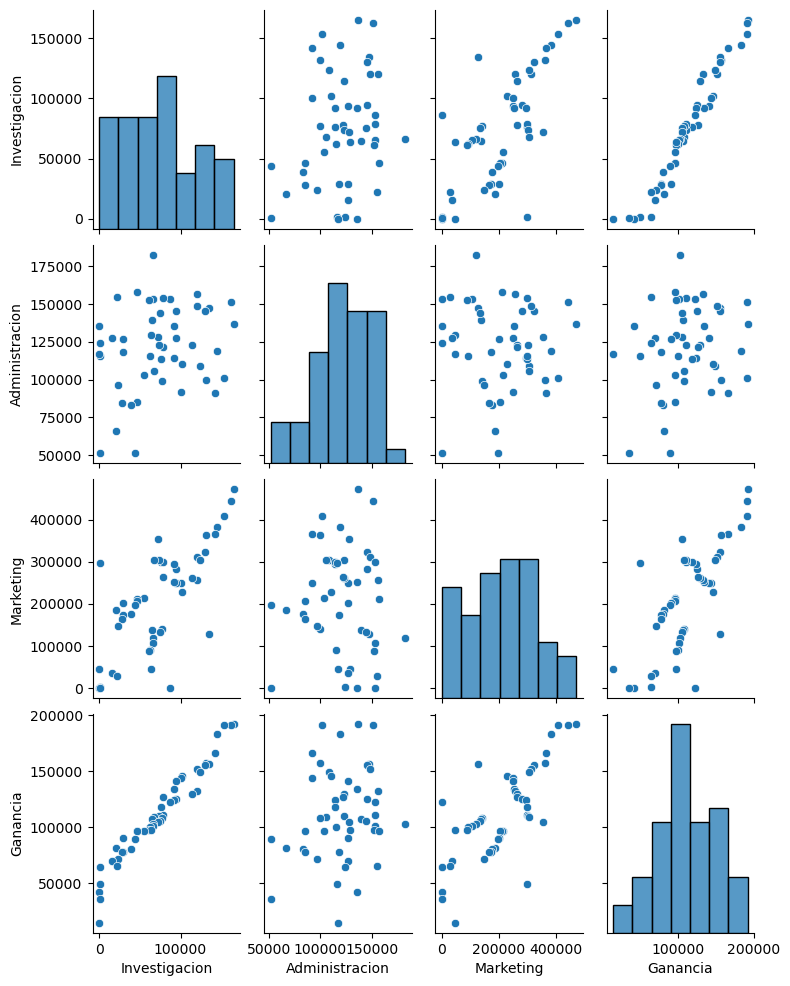

In [265]:
startups = pd.read_csv("50_startups.csv")
sns.pairplot(data=startups, aspect =.8)

In [266]:
# En base a estos gráficos, si quisiéramos predecir la ganancia mediante un modelo lineal 
# utilizando una sola variable predictora, ¿cuál variable utilizaría? Diseñar un experimento para verificar su respuesta

# utilizaría la variable de investigación. 

In [267]:
startups.head()

,Investigacion,Administracion,Marketing,Estado,Ganancia
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [268]:
X = startups[["Investigacion"]]
y = startups["Ganancia"]

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [270]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo.fit(X_train, y_train)   # Realizamos el ajuste
y_pred = modelo.predict(X_test) # Hacemos las predicciones
ECM = mean_squared_error(y_test, y_pred) # Evaluamos el modelo usando ECM
print(f"ECM: {ECM:.2f}")
print(f"Ordenada: {modelo.intercept_.item()}")
print(f"Coeficientes: {modelo.coef_.item()}")

rmse = np.sqrt(ECM)
print("error que queremos minimizar : ", rmse.mean())

ECM: 61375672.24
Ordenada: 47330.48008807521
Coeficientes: 0.8790975884008524
error que queremos minimizar :  7834.26271203698


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


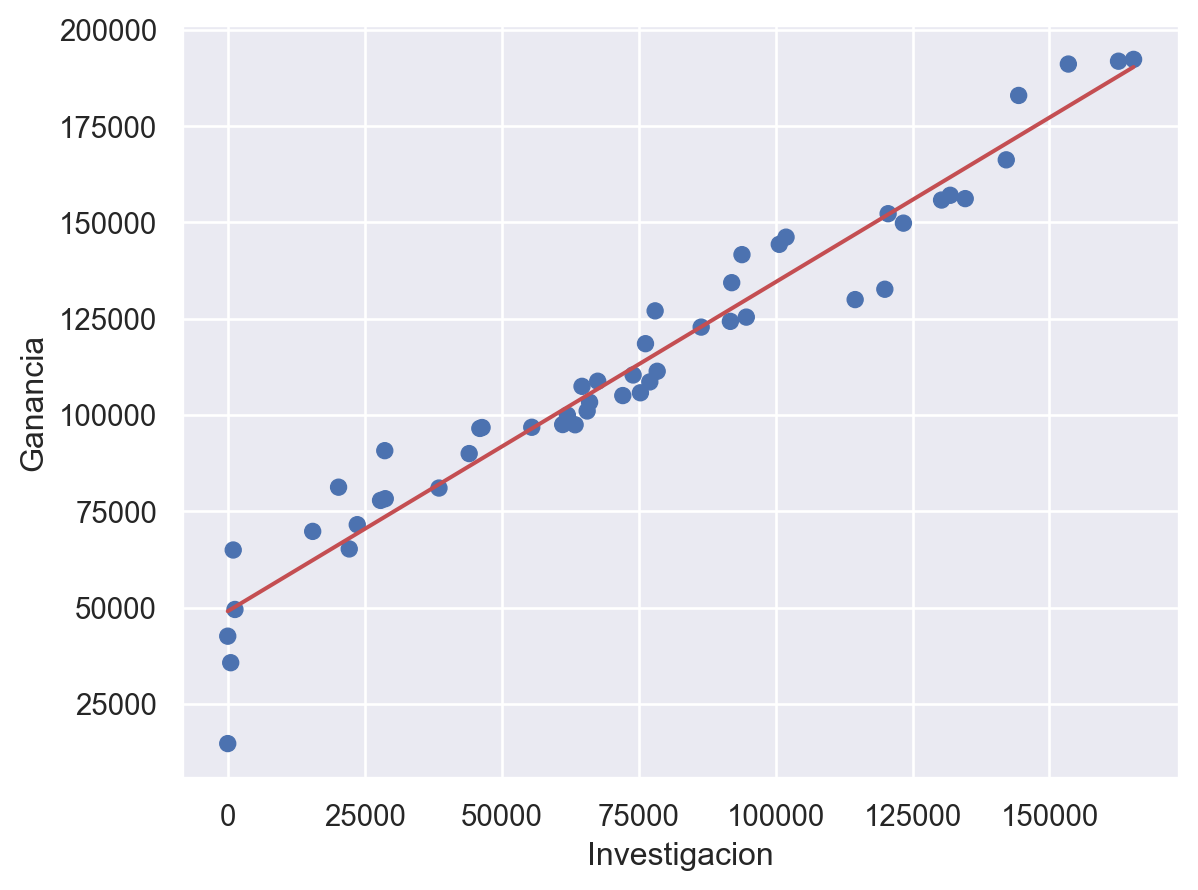

In [271]:
(
    so.Plot(data = startups, x = "Investigacion", y = "Ganancia")
    .add(so.Dot())
    .add(so.Line(color = "r"), so.PolyFit(1))
)

In [272]:
Xm = startups[["Marketing"]]
ym = startups["Ganancia"]

In [273]:
X_trainm, X_testm, y_trainm, y_testm = train_test_split(Xm, ym, test_size=0.7, random_state=42)

In [274]:
modelo2 = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal
modelo2.fit(X_trainm, y_trainm)   # Realizamos el ajuste
y_predm = modelo2.predict(X_testm) # Hacemos las predicciones
r2m = r2_score(y_testm, y_predm)
ECMm = mean_squared_error(y_testm, y_predm) # Evaluamos el modelo usando ECM
print("r2: ", r2)
print("RECM :", np.sqrt(ECMm))
print(f"Ordenada: {modelo2.intercept_.item()}")
print(f"Coeficientes: {modelo2.coef_.item()}")

r2:  0.7910974741669714
RECM : 33069.43172769734
Ordenada: 31809.00689585977
Coeficientes: 0.3379961757784051


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


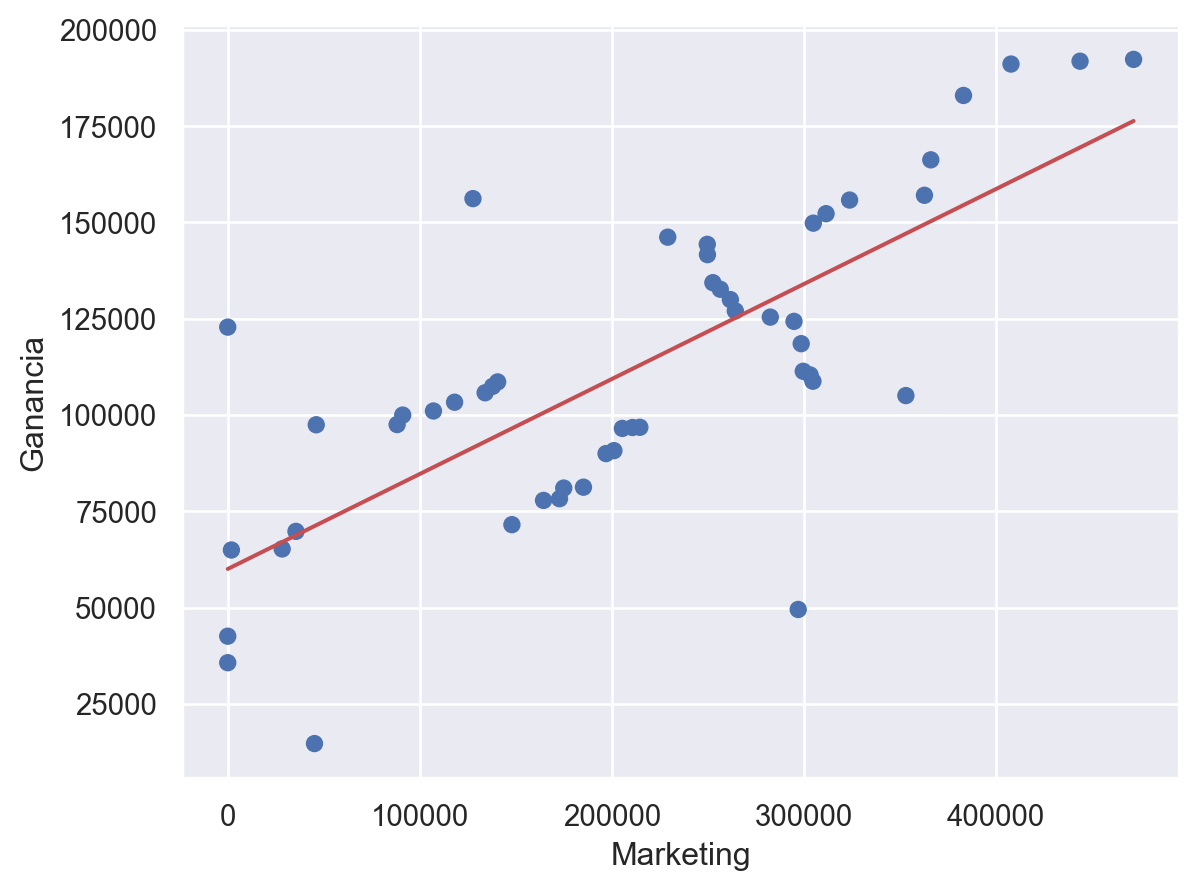

In [275]:
(
    so.Plot(data = startups, x = "Marketing", y = "Ganancia")
    .add(so.Dot())
    .add(so.Line(color = "r"), so.PolyFit(1))
)

In [276]:
# vemos que el ECM del 1er modelo es menor al del 2do modelo

(b) En este ejemplo, ¿considera que un modelo lineal multivariado ayudar´ıa a predecir mejor
la ganancia que el modelo lineal univariado del ´ıtem anterior? Realizar un experimento
para verificar su respuesta

In [277]:
from formulaic import model_matrix
from formulaic import Formula

In [278]:
formula = "Ganancia ~ Investigacion + Administracion + Marketing + Estado"
y, X =  Formula(formula).get_model_matrix(startups)
X.head()

,Intercept,Investigacion,Administracion,Marketing,Estado[T.Florida],Estado[T.New York]
0,1.0,165349.20,136897.80,471784.10,0,1
1,1.0,162597.70,151377.59,443898.53,0,0
2,1.0,153441.51,101145.55,407934.54,1,0
3,1.0,144372.41,118671.85,383199.62,0,1
4,1.0,142107.34,91391.77,366168.42,1,0


In [279]:
# Paso 1: separamos en entrenamiento y testeo el dataframe original
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [280]:
modelo = linear_model.LinearRegression(fit_intercept = False)    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [281]:
print(r2, rmse)

0.8987266414385481 9055.957323204313


3. En el Ejercicio 1 no tuvimos en cuenta el sexo del ping¨uino para predecir el peso, y puede
ser una variable importante. Se quiere predecir ahora el peso de un ping¨uino usando como
variables predictoras el largo de la aleta y el sexo del ping¨uino (utilizar el DataFrame sin datos
faltantes, como vimos en el Ejercicio 1 (a)).

In [282]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [283]:
from formulaic import Formula
from formulaic import model_matrix

In [284]:
formula = "body_mass_g ~ flipper_length_mm + sex"
y,X = Formula(formula).get_model_matrix(penguins)
X.head()

,Intercept,flipper_length_mm,sex[T.Male]
0,1.0,181.0,1
1,1.0,186.0,0
2,1.0,195.0,0
4,1.0,193.0,0
5,1.0,190.0,1


In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
ecm = mean_squared_error(y_test, y_pred)
print("r2: ", r2)
print("ecm:", ecm)

# Por lo que vemos en comparación con el ejercicio 1, mejoramos el modelo
# El r2 del modelo 1 en el ej 1 era 0.7938115564401114

r2:  0.847622126289028
ecm: 95989.19237832072


(a) ¿Cuáles son todos los valores que toma la variable “sex”? ¿Qué tipo de variable es: 
nuéerica o catgóorica, ordinal o nominal? ¿Es una variable binaria

Rta: Toma 2 valores. Es una variable de tipo categórica y nominal. Es una variable binaria.

(d) Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicci´on (ECM). ¿Considera que agregar la variable “sex”
mejor´o el modelo?

In [287]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [288]:
modelo.fit(X, y)
y_pred = modelo.predict(X)
r2 = r2_score(y, y_pred)
ecm = mean_squared_error(y, y_pred)
print("r2: ", r2)
print("ecm: ", ecm)

r2:  0.8058374128212915
ecm:  125511.63258095707


In [289]:
betas = modelo.coef_
o_origen = modelo.intercept_
print("coeficientes: ", betas)
print("b0: ", o_origen)

coeficientes:  [[-5410.30022414    46.98217525   347.85025373]]
b0:  0.0


# CONSULTAR:
**(e) Cómo hago para realizar una visualización apropiada para ver de los datos junto con las predicciones del modelo?**

**(f) Dos pingüinos que tienen igual largo de aleta, uno macho y otro hembra, ¿qué diferencia de peso predice el modelo que tendrán?**

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


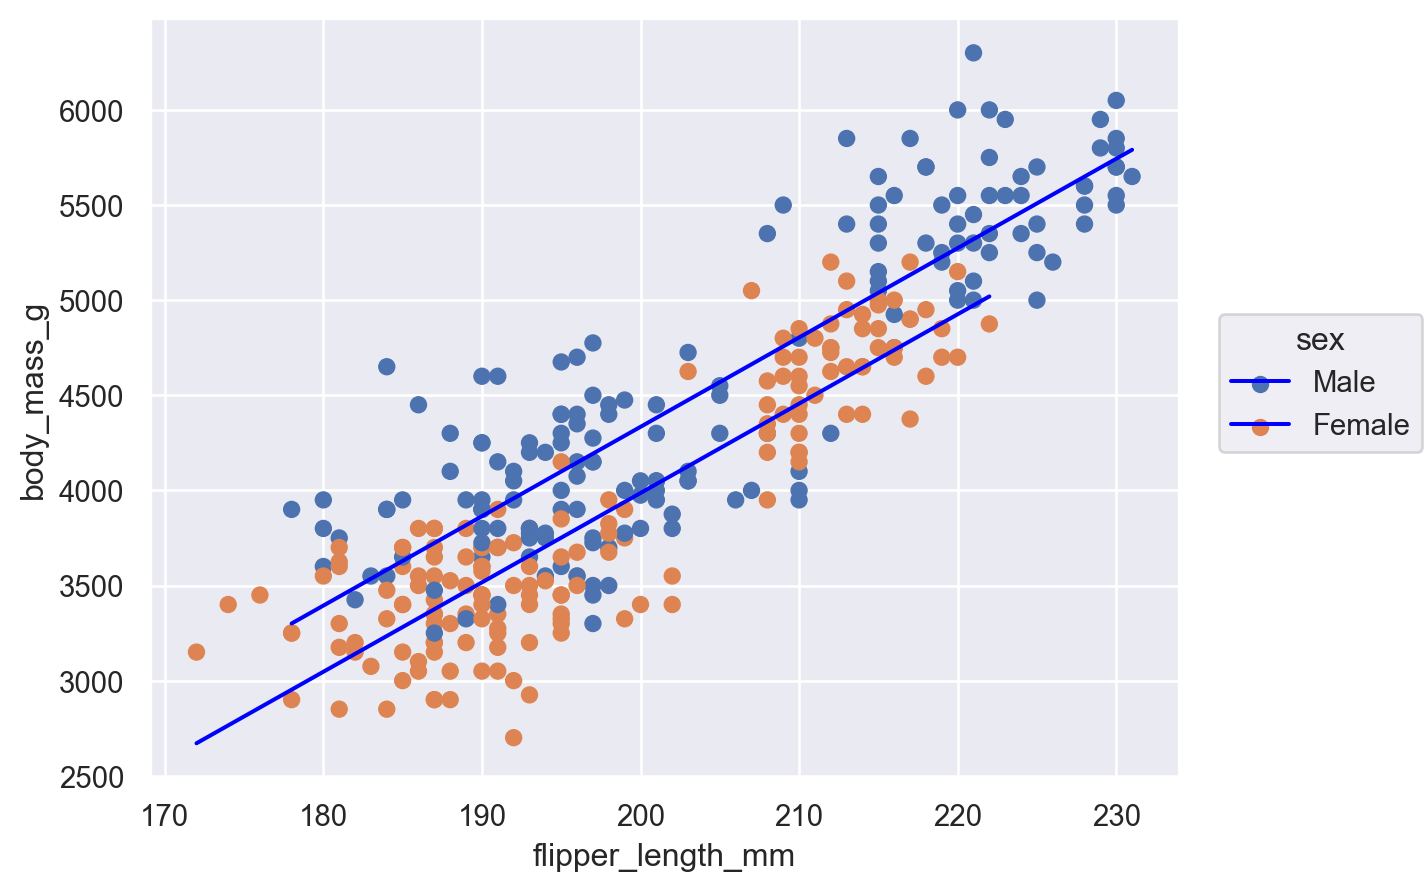

In [294]:
(
    so.Plot(data=penguins, x='flipper_length_mm', y='body_mass_g', color="sex")
    .add(so.Dot())
    .add(so.Line(color = "blue"), y=y_pred.flatten(), color = "sex")
)

# Tiene sentido esto?

4. Ahora se quiere predecir el peso de un pingüino usando como variables predictoras el largo de la aleta y la especie del pingüino.
   
    (a) Trabajamos con la base de pingüinos sin datos faltantes. ¿Cuáles son todos los valores que toma la variable “species”? ¿Qué tipo de variable es: numérica o categórica, ordinal o nominal? ¿Es una variable binaria?

In [103]:
penguins.species.unique()
# toma los valores 'Adelie', 'Chinstrap', 'Gentoo'
# es una variable categórica nominal
# no es una variable binaria

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

**(c) Explicar qué diferencia tiene este modelo respecto al propuesto en el ejercicio 1.**

(d) Codificación de variables categóricas. Si utilizamos Formulaic para generar la matriz de datos e incluimos variables categóricas, automáticamente va a crear las columnas indicadoras con 0’s y 1’s necesarias (variables dummies).

In [104]:
from sklearn.preprocessing import OneHotEncoder
penguins = sns.load_dataset("penguins").dropna()
encoderOHE = OneHotEncoder(sparse_output=False)
species3 = encoderOHE.fit_transform(penguins[["species"]])
species3_df = pd.DataFrame(species3,
                           columns=encoderOHE.get_feature_names_out(),
                           index=penguins.index)
penguins3 = pd.concat([penguins, species3_df], axis=1)
penguins3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_Adelie,species_Chinstrap,species_Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0,0.0,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0,0.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0,0.0,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0,0.0,0.0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1.0,0.0,0.0


In [105]:
print(species3.size)
print(penguins3.size)

999
3330


In [106]:
# Crear variables dummy para la variable categórica 'species'
penguins_dummies = pd.get_dummies(penguins["species"]).astype(int)
penguins_with_dummies = pd.concat([penguins, penguins_dummies], axis=1)
penguins_with_dummies.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Adelie,Chinstrap,Gentoo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1,0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1,0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1,0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1,0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,1,0,0


**(e)** Ajustar el modelo usando todos los datos disponibles. Reportar los coeficientes encontrados y calcular el error de predicción.

In [297]:
formula = "body_mass_g ~ flipper_length_mm + species"
y, X = Formula(formula).get_model_matrix(penguins_with_dummies)
X.head()

,Intercept,flipper_length_mm,species[T.Chinstrap],species[T.Gentoo]
0,1.0,181.0,0,0
1,1.0,186.0,0,0
2,1.0,195.0,0,0
4,1.0,193.0,0,0
5,1.0,190.0,0,0


In [298]:
modelo = linear_model.LinearRegression(fit_intercept=False)
modelo.fit(X, y)
y_pred = modelo.predict(X)
betas = modelo.coef_
o_origen = modelo.intercept_
r2 = r2_score(y, y_pred)
ecm = mean_squared_error(y, y_pred)
print("coefs: ", betas)
print("o_origen: ", o_origen)
print("r2: ", r2)
print("ecm: ", ecm)

coefs:  [[-4013.17888796    40.60616529  -205.37547984   284.52360284]]
o_origen:  0.0
r2:  0.7870332829483717
ecm:  137667.1001914201


**(f) CONSULTAR:** Realizar una visualización apropiada para ver de los datos junto con las predicciones del 
modeo.o

C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


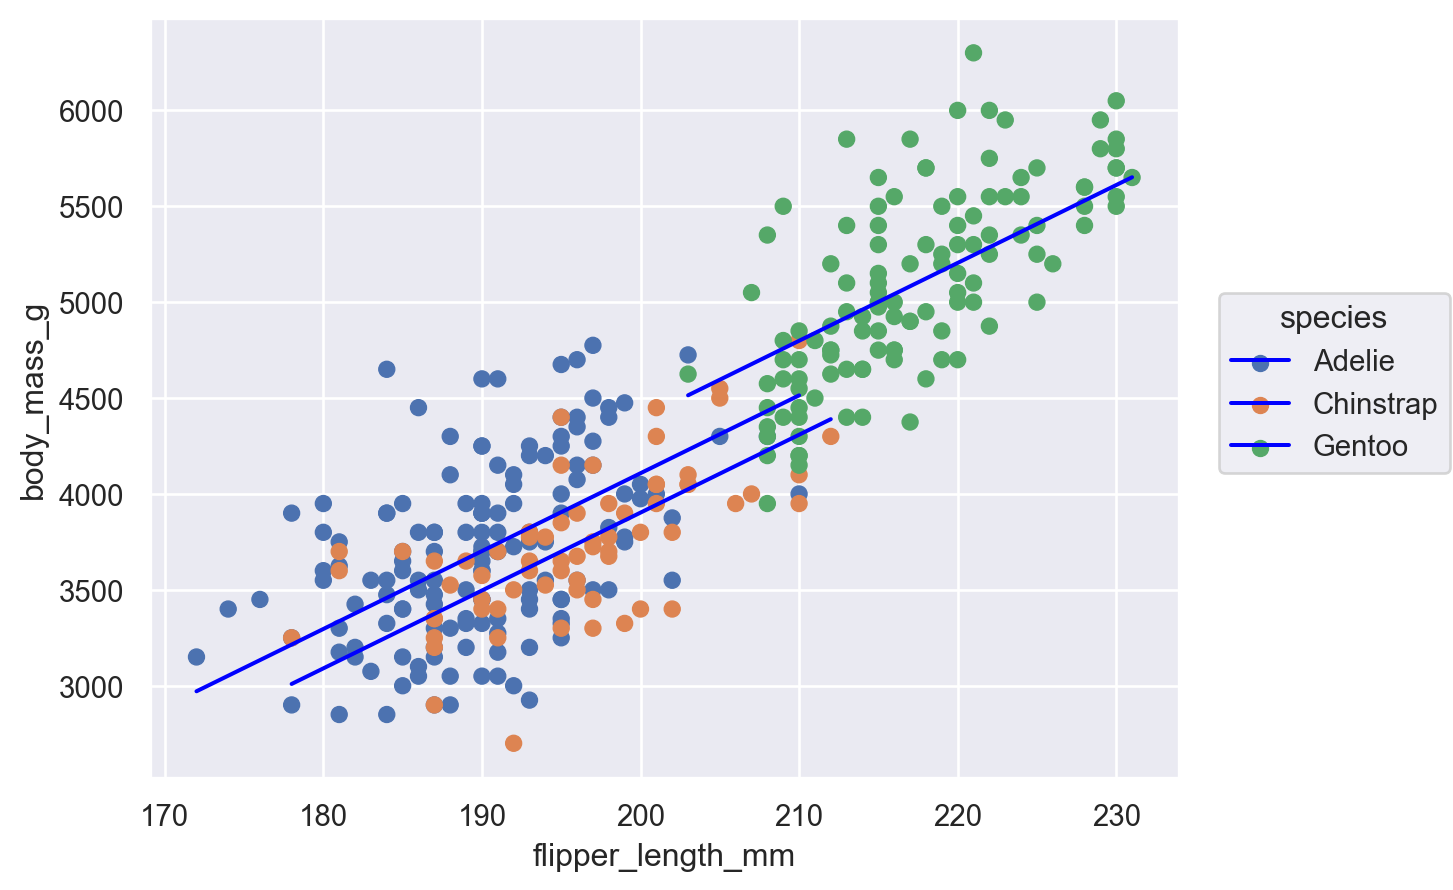

In [299]:
(
    so.Plot(data=penguins, x='flipper_length_mm', y='body_mass_g', color="species")
    .add(so.Dot())
    .add(so.Line(color = "blue"), y=y_pred.flatten(), color = "species") # pregunta: por qué acá tuve que volver a aclarar color = "species" si ya lo había puesto arriba
)

5. En este ejercicio trabajaremos con el dataset de inmuebles (inmuebles.csv). El objetivo de este ejercicio es comparar tres modelos lineales para predecir el precio de un inmueble:

- Modelo 1: precio ∼ superficie

- Modelo 2: precio ∼ superficie + zona

- Modelo 3: un modelo propuesto por usted

Como medida de comparación utilizaremos la raíz cuadrada del ECM, que notaremos RECM.

En cada ítem, indicar qué modelo tiene el mejor desempeño.

**(a) Nivel 1.** Entrenar cada modelo sobre la totalidad de los datos disponibles. Graficar, en una misma figura, los datos y las predicciones del modelo 2 y del modelo 3. Las predicciones deben estar señaladas en la leyenda (recuerde el uso del argumento label) y las líneas del modelo 3 deben estar punteadas (investigue agregar linestyle='--' donde corresponda). Puede adaptar el siguiente código:

(so.Plot(data=data, x='superficie', y='precio')
 .add(so.Dot(), color='zona')
 .add(so.Line(), y=modelo.predict(X).flatten(),
      color='zona', linestyle='--')
)


In [110]:
inmuebles = pd.read_csv("inmuebles.csv")
inmuebles.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


In [111]:
# Modelo 1:
formula1 = "precio ~ superficie"
y1, X1 = Formula(formula1).get_model_matrix(inmuebles)
modelo1 = linear_model.LinearRegression(fit_intercept=False)
modelo1.fit(X1, y1)
y_pred1 = modelo1.predict(X1)
r2 = r2_score(y1, y_pred1)
ecm = mean_squared_error(y1, y_pred1)
print(r2, ecm)

0.8762114698357936 2630.9300019446955


In [112]:
# Crear variables dummy para la variable categórica 'species'
inmuebles_dummies = pd.get_dummies(inmuebles["zona"]).astype(int)
inmuebles_dummies = pd.concat([inmuebles, inmuebles_dummies], axis=1)
inmuebles_dummies.head()

,superficie,precio,zona,Zona 1,Zona 2,Zona 3
0,110.0,454.425690,Zona 2,0,1,0
1,109.0,383.004114,Zona 2,0,1,0
2,101.0,437.362638,Zona 2,0,1,0
3,58.0,304.392486,Zona 3,0,0,1
4,129.0,620.027722,Zona 3,0,0,1


In [113]:
# Modelo 2:
formula2 = "precio ~ superficie + zona"
y2, X2 = Formula(formula2).get_model_matrix(inmuebles_dummies)
modelo2 = linear_model.LinearRegression(fit_intercept=False)
modelo2.fit(X2, y2)
y_pred2 = modelo2.predict(X2)
r2 = r2_score(y2,y_pred2)
ecm = mean_squared_error(y2,y_pred2)
print(r2,ecm)

0.9580813979513345 890.9137835558798


In [114]:
# Modelo 3:
formula3 = "precio ~ superficie:zona"
y3, X3 = Formula(formula3).get_model_matrix(inmuebles_dummies)
modelo3 = linear_model.LinearRegression(fit_intercept=False)
modelo3.fit(X3, y3)
y_pred3 = modelo3.predict(X3)
r2 = r2_score(y3,y_pred3)
ecm = mean_squared_error(y3,y_pred3)
print(r2,ecm)

0.9732554953611157 568.4122717044387


C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):
C:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\_core\plot.py:1491: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", True):


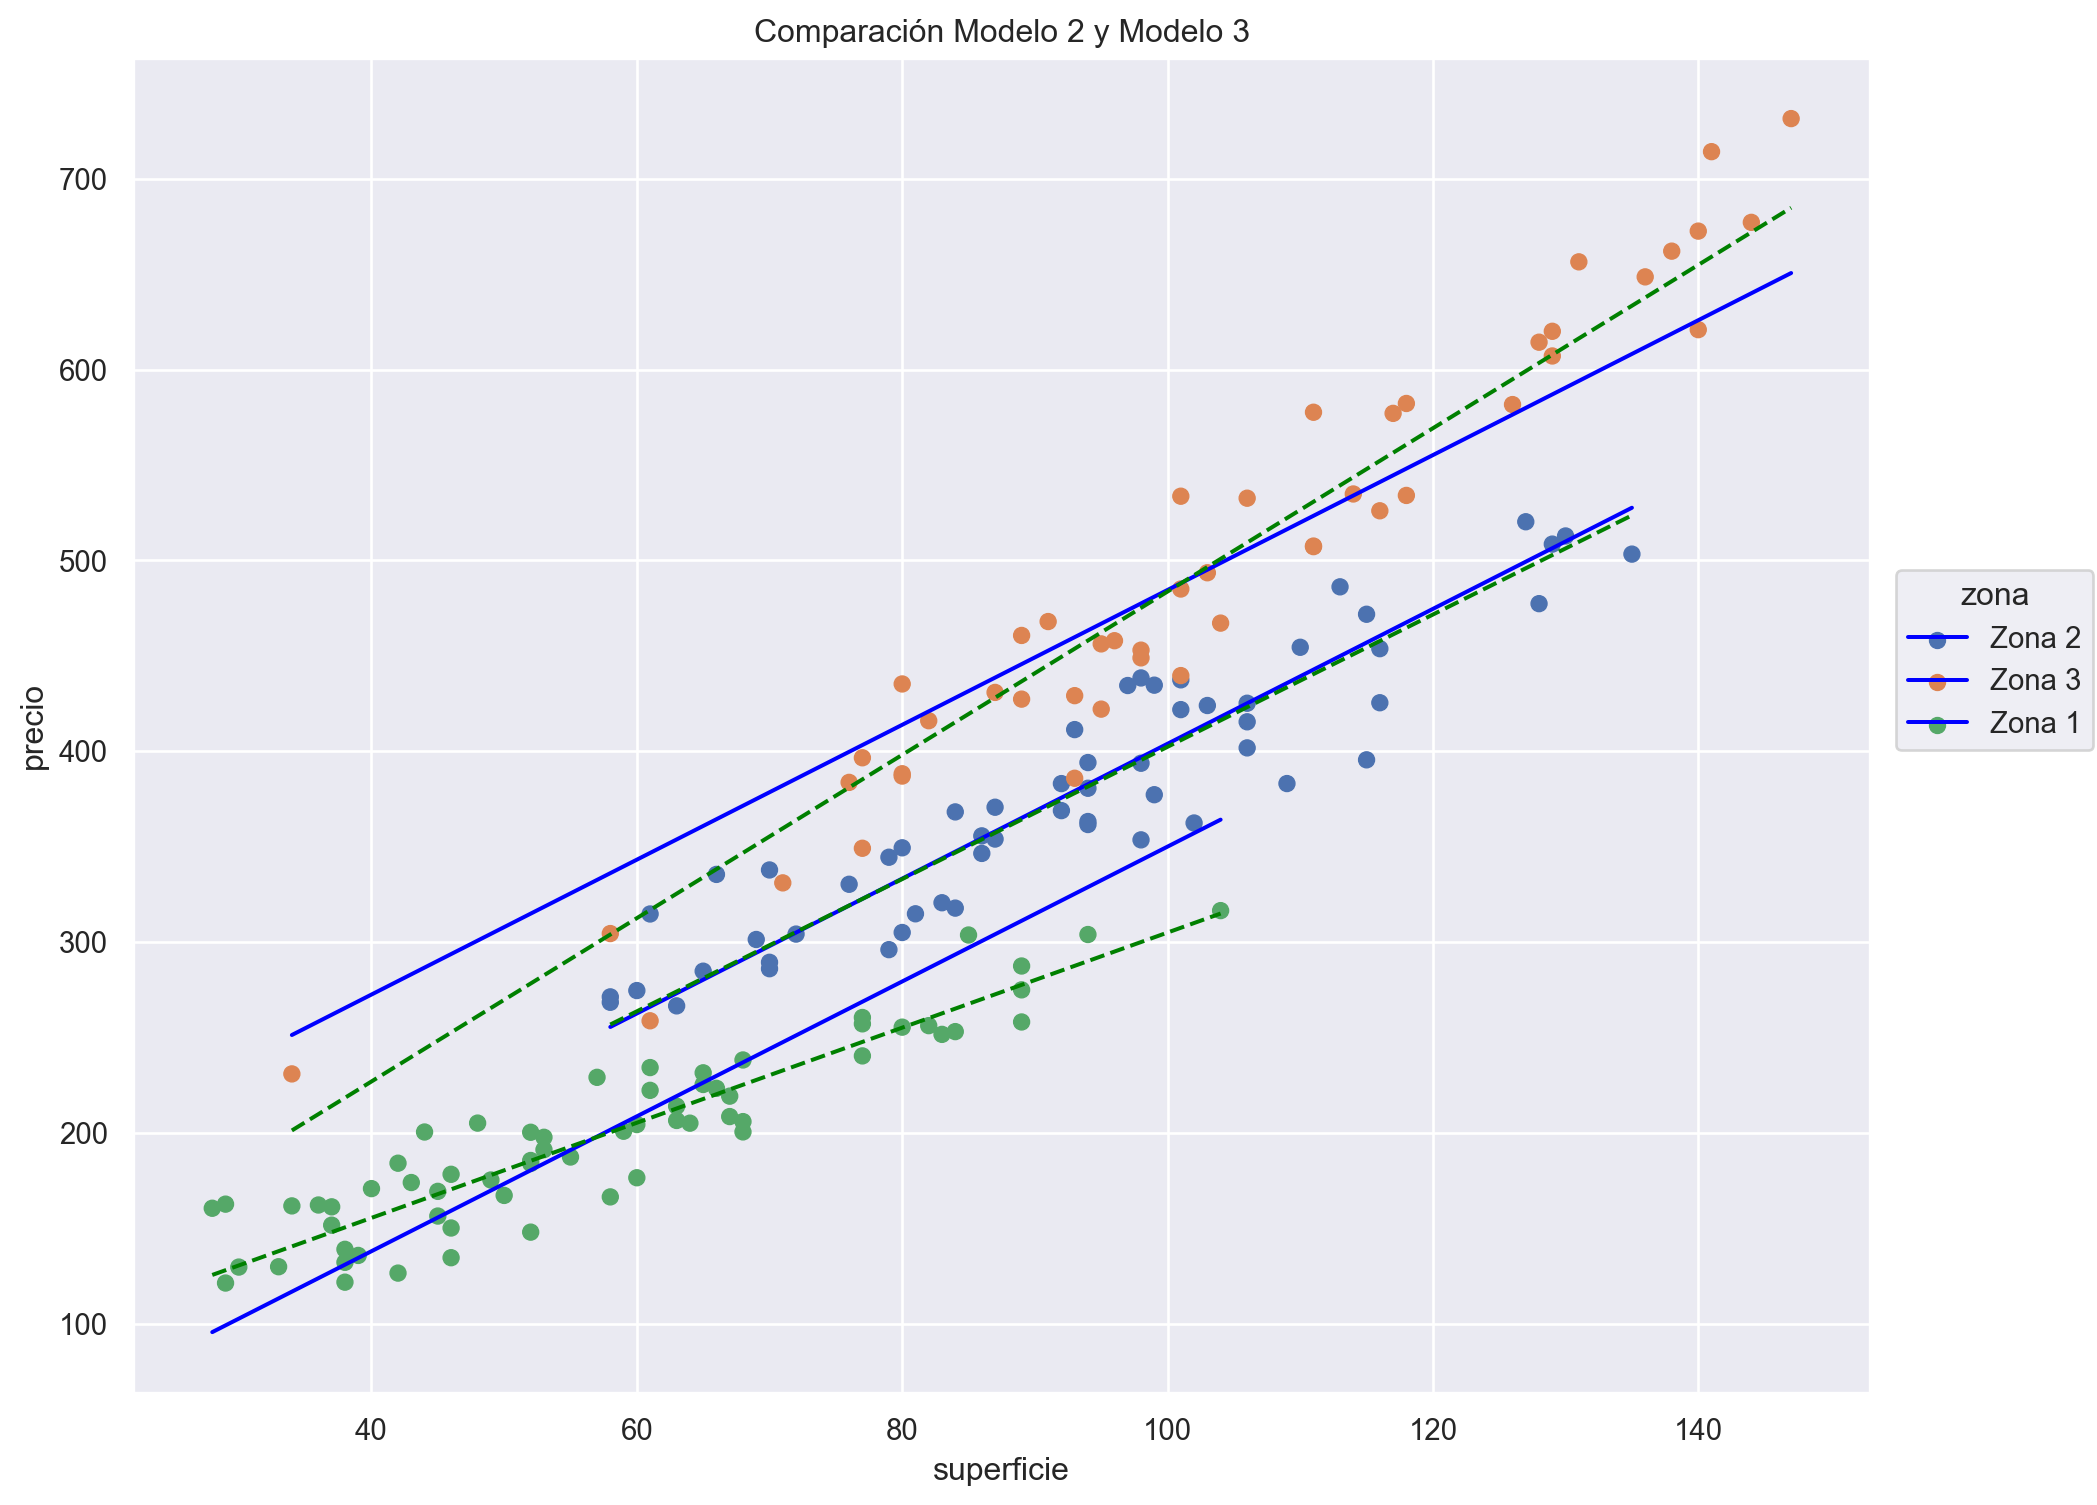

In [117]:
(
    so.Plot(data=inmuebles_dummies, x='superficie', y='precio', color='zona')
    .add(so.Dot())
    .add(so.Line(color = "blue"), y=y_pred2.flatten())
    .add(so.Line(color='green', linestyle="--"), y=y_pred3.flatten())
    .layout(size=(10,8))
    .label(title = "Comparación Modelo 2 y Modelo 3")
)

**(b) Nivel 2.** Separar los datos en conjuntos de entrenamiento (train) y prueba (test). Entrenar 
cada modelo sobre el mismo conjunto de entrenamiento   comparar su desempñno sobr 
el conjunto de prueba.

In [300]:
# Definir las fórmulas
formula1 = "precio ~ superficie"
formula2 = "precio ~ superficie + zona"
formula3 = "precio ~ superficie:zona"

# Obtener las matrices de diseño para cada fórmula
y1, X1 = Formula(formula1).get_model_matrix(inmuebles)
y2, X2 = Formula(formula2).get_model_matrix(inmuebles_dummies)
y3, X3 = Formula(formula3).get_model_matrix(inmuebles_dummies)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Entrenar modelos
modelo1 = linear_model.LinearRegression(fit_intercept=False)
modelo1.fit(X_train, y_train)
y_pred1 = modelo1.predict(X_test)

# Utilizar los mismos conjuntos de entrenamiento para los otros modelos
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
modelo2 = linear_model.LinearRegression(fit_intercept=False)
modelo2.fit(X_train, y_train)
y_pred2 = modelo2.predict(X_test)

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
modelo3 = linear_model.LinearRegression(fit_intercept=False)
modelo3.fit(X_train, y_train)
y_pred3 = modelo3.predict(X_test)

# Calcular métricas de rendimiento
r2_modelo1 = r2_score(y_test, y_pred1)
ecm_modelo1 = mean_squared_error(y_test, y_pred1)
print("Modelo 1:")
print("R2:", r2_modelo1)
print("ECM:", ecm_modelo1)

r2_modelo2 = r2_score(y_test, y_pred2)
ecm_modelo2 = mean_squared_error(y_test, y_pred2)
print("\nModelo 2:")
print("R2:", r2_modelo2)
print("ECM:", ecm_modelo2)

r2_modelo3 = r2_score(y_test, y_pred3)
ecm_modelo3 = mean_squared_error(y_test, y_pred3)
print("\nModelo 3:")
print("R2:", r2_modelo3)
print("ECM:", ecm_modelo3)

# Parece que el que mejor desempeño tiene es el Modelo 3

Modelo 1:
R2: 0.8432462515821447
ECM: 3251.8883336275526

Modelo 2:
R2: 0.9228218904752273
ECM: 1601.0755500788407

Modelo 3:
R2: 0.9518375405882162
ECM: 999.1399979954181


**(c) Nivel 3.** Separar los datos en dos conjuntos: entrenamiento y testeo. Luego, dividir el conjunto de entrenamiento en dos subconjuntos: entrenamiento y validación. Entrenar cada modelo sobre el conjunto de entrenamiento y comparar su desempeño en el conjunto de validación. Elija el que usted considere el más apropiado, entrénelo sobre la unión de los datos de testeo y validación y calcule la RMSE y el R2 sobre el conjunto de testeo.

In [302]:
df_train, df_test = train_test_split(inmuebles_dummies, test_size=0.2, random_state=42)

# Definir las fórmulas
formula1 = "precio ~ superficie"
formula2 = "precio ~ superficie + zona"
formula3 = "precio ~ superficie:zona"

# Obtener las matrices de diseño para cada fórmula
y1, X1 = Formula(formula1).get_model_matrix(df_train)
y2, X2 = Formula(formula2).get_model_matrix(df_train)
y3, X3 = Formula(formula3).get_model_matrix(df_train)

X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state=42)
modelo1 = linear_model.LinearRegression(fit_intercept=False)
modelo1.fit(X_train, y_train)
y_pred1 = modelo1.predict(X_val)

X_train, X_val, y_train, y_val = train_test_split(X2, y2, test_size=0.2, random_state=42)
modelo2 = linear_model.LinearRegression(fit_intercept=False)
modelo2.fit(X_train, y_train)
y_pred2 = modelo2.predict(X_val)

X_train, X_val, y_train, y_val = train_test_split(X3, y3, test_size=0.2, random_state=42)
modelo3 = linear_model.LinearRegression(fit_intercept=False)
modelo3.fit(X_train, y_train)
y_pred3 = modelo3.predict(X_val)

# Calcular métricas de rendimiento
r2_modelo1 = r2_score(y_val, y_pred1)
ecm_modelo1 = mean_squared_error(y_val, y_pred1)
print("Modelo 1:")
print("R2:", r2_modelo1)
print("RECM:", np.sqrt(ecm_modelo1))

r2_modelo2 = r2_score(y_val, y_pred2)
ecm_modelo2 = mean_squared_error(y_val, y_pred2)
print("\nModelo 2:")
print("R2:", r2_modelo2)
print("RECM:", np.sqrt(ecm_modelo2))

r2_modelo3 = r2_score(y_val, y_pred3)
ecm_modelo3 = mean_squared_error(y_val, y_pred3)
print("\nModelo 3:")
print("R2:", r2_modelo3)
print("RECM:", np.sqrt(ecm_modelo3))

Modelo 1:
R2: 0.8509809124286933
RECM: 53.82535308208889

Modelo 2:
R2: 0.9605078276621805
RECM: 27.709038059888606

Modelo 3:
R2: 0.9735069241771614
RECM: 22.695101460180275


In [307]:
# Ajustamos nuestro modelo ganador en TODO el conjunto de entrenamiento. 
formula3 = "precio ~ superficie:zona"

y3, X3 = Formula(formula3).get_model_matrix(df_train)
modelo3.fit(X3, y3)

# Realizamos las mismas transformaciones en el conjunto de testeo
y_test, X_test = Formula(formula3).get_model_matrix(df_test)

# Predicciones
y_pred = modelo3.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadrada del ECM: ', np.sqrt(ecm))

R^2:  0.9518375405882162
Raiz cuadrada del ECM:  31.60917585125272


**(d) Nivel 4** - Validación Cruzada k-Fold. Aplicar validación cruzada en k pliegues con k = 6. Para esto, separar el conjunto de datos en entrenamiento y testeo. Aplicar la técnica de Validación Cruzada k-Fold para cada modelo con el conjunto de entrenamiento. Elegir el modelo con el menor promedio de RMSE y calcular el RMSE y el R2 sobre el conjunto de testeo

**está bien la resolución?**

In [126]:
cv = KFold(n_splits=6, random_state=42, shuffle=True)

In [127]:
rmse1 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0
# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, test_index in cv.split(X1):
    X_train, X_val, y_train, y_val = X1.iloc[train_index], X1.iloc[test_index], y1.iloc[train_index], y1.iloc[test_index]
    modelo1.fit(X_train, y_train)
    y_pred = modelo1.predict(X_val)
    rmse1[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse1.mean()) # error que queremos minimizar

51.851433883781574


In [128]:
rmse2 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0
# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, test_index in cv.split(X2):
    X_train, X_val, y_train, y_val = X2.iloc[train_index], X2.iloc[test_index], y2.iloc[train_index], y2.iloc[test_index]
    modelo2.fit(X_train, y_train)
    y_pred = modelo2.predict(X_val)
    rmse2[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse2.mean()) # error que queremos minimizar

30.29688200129608


In [129]:
rmse3 = np.zeros(cv.get_n_splits())  # Vamos a guardar el error en cada pliego
ind = 0
# Para seleccionar algunas filas dados los índices, utilizamos iloc (lo vimos en la clase 2)
for train_index, test_index in cv.split(X3):
    X_train, X_val, y_train, y_val = X3.iloc[train_index], X3.iloc[test_index], y3.iloc[train_index], y3.iloc[test_index]
    modelo3.fit(X_train, y_train)
    y_pred = modelo3.predict(X_val)
    rmse3[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
    ind = ind + 1

print(rmse3.mean()) # error que queremos minimizar

24.20107584707253


**6. Regresión Ridge.** 

Queremos estimar los gastos en tarjeta de crédito de un conjunto de 
clientes a partir de informacóon de los clientes. Utilizamos el dataset credit.csv

In [322]:
# (a) Cargar el dataset con Pandas. En regresión Ridge, variables en distintas escalas pueden afectar el modelo,
# por lo tanto, es conveniente llevar todas las variables a una misma escala, por ejemplo, al intervalo [0, 1].
# Para eso podemos utilizar el siguiente código.
df = pd.read_csv("Credit.csv")
columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']
df[columns] /= df[columns].max()

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,0.079787,0.259182,0.288187,0.222222,0.346939,0.55,Male,No,Yes,Caucasian,333
1,0.568090,0.477611,0.491853,0.333333,0.836735,0.75,Female,Yes,Yes,Asian,903
2,0.560418,0.508517,0.523422,0.444444,0.724490,0.55,Male,No,No,Asian,580
3,0.797947,0.683102,0.693483,0.333333,0.367347,0.55,Female,No,No,Asian,964
4,0.299420,0.351973,0.363544,0.222222,0.693878,0.80,Male,No,Yes,Caucasian,331


(b) Separar los datos en entrenamiento y testeo, ajustar un modelo lineal en los datos de
entranamiento y calcular el RMSE (ra´ız del error cuadr´atico medio) en los datos datos de
testeo.

In [324]:
formula_prueba = "Balance ~ Income + Limit + Rating + Cards + Age + Education + Gender + Student + Married + Ethnicity"
y, X = Formula(formula_prueba).get_model_matrix(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [327]:
modelo_prueba = linear_model.LinearRegression(fit_intercept=False)
modelo_prueba.fit(X_train, y_train)
y_pred = modelo_prueba.predict(X_test)
r2 = r2_score(y_test, y_pred)
recm = np.sqrt(mean_squared_error(y_test, y_pred))
print("r2: ", r2)
print("recm: ", recm)

r2:  0.9522674050276404
recm:  89.30205176557337


(c) Obtener por validaci´on cruzada en los datos de entrenamiento el valor ´optimo para el
hiperpar´ametro α de regresi´on Ridge. Utilizar como vector de b´usqueda alphas =
np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1]).

In [345]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
y, X = Formula(formula_prueba).get_model_matrix(df_train)
alphas = np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1])
alpha = alphas[0]
cv = KFold(n_splits=5, random_state=42, shuffle=True)
for alpha in alphas:
    modeloRidge = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    rmse = np.zeros(cv.get_n_splits())
    ind = 0
    for train_index, test_index in cv.split(X):
        X_train, X_val, y_train, y_val = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        modeloRidge.fit(X_train, y_train)
        y_pred = modeloRidge.predict(X_val)
        rmse[ind] = np.sqrt(mean_squared_error(y_val, y_pred))
        ind = ind +1
    print(f"Para alpha = {alpha:.5f} la raíz del Error Cuadratico Medio es: {rmse.mean():.5f}")

Para alpha = 0.00100 la raíz del Error Cuadratico Medio es: 104.16328
Para alpha = 0.00500 la raíz del Error Cuadratico Medio es: 104.21126
Para alpha = 0.01000 la raíz del Error Cuadratico Medio es: 104.27593
Para alpha = 0.02000 la raíz del Error Cuadratico Medio es: 104.38961
Para alpha = 0.10000 la raíz del Error Cuadratico Medio es: 105.27712
Para alpha = 0.50000 la raíz del Error Cuadratico Medio es: 116.19664
Para alpha = 1.00000 la raíz del Error Cuadratico Medio es: 134.59217


(d) Con el valor obtenido, ajustar el modelo de regresi´on Ridge a los datos de entreanamiento.

In [349]:
# el alpha elegido entonces, es el 0.001
alpha_optimo = 0.001
modeloRidge = linear_model.Ridge(alpha = alpha_optimo, fit_intercept=False)
modeloRidge.fit(X, y)

Ridge(alpha=0.001, fit_intercept=False)

(e) Calcular el RMSE (ra´ız del error cuadr´atico medio) en los datos de testeo

In [353]:
y_test, X_test = Formula(formula_prueba).get_model_matrix(df_test)
y_pred = modeloRidge.predict(X_test)
r2 = r2_score(y_test, y_pred)
recm = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"r2: {r2:.5}, recm: {recm:.5}")

# Está bien hecho? Tienen sentido los resultados?

r2: 0.95228, recm: 89.287


**(f) ¿En cuál de los dos modelos obtuvo mejor resultados?** de cuáles modelos habla?